# 深度学习基础教程

本notebook介绍了PyTorch深度学习的核心概念和代码示例，包括：
- 张量操作
- 自动微分
- 神经网络搭建
- 损失函数与优化器

In [ ]:
# 1. 张量的创建与基本操作

import torch

def demo_tensor_creation():
    """演示张量的基本创建方法"""
    # 创建标量张量
    t1 = torch.tensor(10)
    print("标量张量:")
    print(t1)

    # 创建列表张量
    data = [[4, 5, 6], [1, 2, 3]]
    t2 = torch.tensor(data)
    print("\n二维张量:")
    print(t2)
    print(f"类型: {type(t2)}")

def demo_tensor_special():
    """演示特殊张量的创建"""
    # 创建未初始化的张量
    t6 = torch.Tensor(3, 4)
    print("\n未初始化张量 (3x4):")
    print(t6)

    # 创建指定类型的张量
    t5 = torch.IntTensor(3, 4)
    print("\n整型张量 (3x4):")
    print(t5)

if __name__ == '__main__':
    print("=" * 50)
    print("【张量创建示例】")
    print("=" * 50)
    demo_tensor_creation()
    demo_tensor_special()

In [ ]:
# 2. 创建线性和随机张量

import torch

def demo_sequence_tensors():
    """演示序列张量的创建"""
    # arange: 创建等差数列
    t1 = torch.arange(0, 10, 2)
    print("arange创建的等差张量 [0, 10, 步长2]:")
    print(t1)
    print(f"类型: {type(t1)}\n")

    # linspace: 创建线性等间距张量
    t2 = torch.linspace(1, 10, 4)
    print("linspace创建的等间距张量 [1, 10, 4个点]:")
    print(t2)

def demo_random_tensors():
    """演示随机张量的创建"""
    print("\n" + "=" * 50)
    print("【随机张量示例】")
    print("=" * 50)
    
    # 均匀分布随机张量 [0, 1)
    t1 = torch.rand(size=(2, 3))
    print("\n均匀分布随机张量 (2x3):")
    print(t1)

    # 设置随机种子
    torch.manual_seed(3)
    t1_seeded = torch.rand(size=(2, 3))
    print("\n设置种子后的随机张量:")
    print(t1_seeded)

    # 正态分布随机张量
    t2 = torch.randn(size=(2, 3))
    print("\n正态分布随机张量 (2x3):")
    print(t2)

if __name__ == '__main__':
    demo_sequence_tensors()
    demo_random_tensors()

In [1]:
# 3. 张量类型转换

import torch

# 创建浮点型张量
t1 = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
print("原始张量 (float32):")
print(t1)
print(f"类型: {t1.dtype}\n")

# 转换为int16
t2 = t1.type(torch.int16)
print("转换为int16:")
print(t2)
print(f"类型: {t2.dtype}\n")

# 演示各种类型转换方法
print("=== 类型转换示例 ===")
print(f"half() (float16): {t2.half().dtype}")
print(f"double() (float64): {t2.double().dtype}")
print(f"short() (int16): {t2.short().dtype}")
print(f"long() (int64): {t2.long().dtype}")

原始张量 (float32):
tensor([1., 2., 3., 4., 5.])
类型: torch.float32

转换为int16:
tensor([1, 2, 3, 4, 5], dtype=torch.int16)
类型: torch.int16

=== 类型转换示例 ===
half() (float16): torch.float16
double() (float64): torch.float64
short() (int16): torch.int16
long() (int64): torch.int64


In [ ]:
# 4. 创建全0、全1和填充张量

import torch

print("=== 全1张量 ===")
t1 = torch.ones(2, 3)
print(f"ones(2, 3):\n{t1}\n")

print("=== 全1张量（参照给定张量形状）===")
t2 = torch.tensor([[1, 2], [3, 4], [5, 6]])
t3 = torch.ones_like(t2)
print(f"参照张量:\n{t2}")
print(f"\nones_like结果:\n{t3}\n")

print("=== 填充张量 ===")
t4 = torch.full(size=(2, 3), fill_value=255)
print(f"full((2,3), 255):\n{t4}")

In [1]:
# 5. 张量与NumPy数组转换

import torch
import numpy as np

def demo_tensor_to_numpy():
    """演示张量转NumPy"""
    print("=== 张量 → NumPy ===")
    t1 = torch.tensor([1, 2, 3, 4, 5])
    n1 = t1.numpy()
    print(f"原始张量: {t1}")
    print(f"转换后NumPy: {n1}")
    
    # 注意：共享内存
    n1[0] = 100
    print(f"\n修改NumPy后:")
    print(f"NumPy: {n1}")
    print(f"张量（已改变）: {t1}")

def demo_numpy_to_tensor():
    """演示NumPy转张量"""
    print("\n=== NumPy → 张量 ===")
    n1 = np.array([11, 22, 33])
    print(f"原始NumPy: {n1}")
    
    # 方法1: from_numpy (共享内存)
    t1 = torch.from_numpy(n1)
    print(f"from_numpy: {t1}")
    
    # 方法2: torch.tensor (不共享内存)
    t2 = torch.tensor(n1)
    print(f"torch.tensor: {t2}")

def demo_scalar_extraction():
    """演示标量提取"""
    print("\n=== 标量提取 ===")
    t1 = torch.tensor(100)
    print(f"张量: {t1}")
    
    a = t1.item()
    print(f"使用.item()提取: {a} (类型: {type(a)})")

if __name__ == '__main__':
    demo_tensor_to_numpy()
    demo_numpy_to_tensor()
    demo_scalar_extraction()

In [ ]:
# 6. 张量的基本运算

import torch

t1 = torch.tensor([1, 2, 3, 4, 5])
print(f"原始张量: {t1}\n")

print("=== 基本算术运算 ===")
print(f"取反 (neg()): {t1.neg()}")
print(f"加法 (+2): {t1 + 2}")
print(f"减法 (-2): {t1 - 2}")
print(f"乘法 (*2): {t1 * 2}")
print(f"除法 (/2): {t1 / 2}")

In [ ]:
# 7. 点乘与矩阵乘法

import torch

def demo_element_wise_multiply():
    """演示逐元素乘法（点乘）"""
    print("=== 逐元素乘法 (Element-wise Multiply) ===")
    t1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
    t2 = torch.tensor([[2, 3, 4], [1, 2, 3]])
    
    print(f"张量1:\n{t1}")
    print(f"\n张量2:\n{t2}")
    print(f"\n点乘结果 (t1 * t2):\n{t1 * t2}")

def demo_matrix_multiply():
    """演示矩阵乘法"""
    print("\n=== 矩阵乘法 (Matrix Multiplication) ===")
    t1 = torch.tensor([[1, 2, 3], [4, 5, 6]])  # (2, 3)
    t2 = torch.tensor([[1, 2], [3, 4], [5, 6]])  # (3, 2)
    
    print(f"张量1 (2x3):\n{t1}")
    print(f"\n张量2 (3x2):\n{t2}")
    print(f"\n矩阵乘法结果 (2x2):\n{t1 @ t2}")

if __name__ == '__main__':
    demo_element_wise_multiply()
    demo_matrix_multiply()

## 8. 张量索引

张量索引是获取张量中特定元素的重要操作。

In [ ]:
# 张量索引示例

import torch

# 设置随机种子，确保结果可复现
torch.manual_seed(42)

# 创建5x5的随机张量
t1 = torch.randint(1, 10, (5, 5))
print("原始张量 (5x5):")
print(t1)
print()

print("=== 基础索引 ===")
print(f"t1[1] (第2行): {t1[1]}")
print(f"t1[:1, 2] (第1行，第3列): {t1[:1, 2]}")
print()

print("=== 高级索引 ===")
print(f"t1[[1,3], [2,4]] (第2行第3列 + 第4行第5列): {t1[[1,3], [2,4]]}")
print()

print("=== 条件索引 ===")
# 第3列大于5的行数据
col_3 = t1[:, 2]
mask = col_3 > 5
print(f"第3列: {col_3}")
print(f"第3列大于5的行索引: {mask.nonzero().squeeze()}")
print(f"满足条件的数据: {col_3[mask]}")

## 9. 张量的形状操作

形状操作是深度学习中非常重要的操作，包括reshape、unsqueeze、squeeze、transpose等。

In [ ]:
# 张量的形状操作

import torch

torch.manual_seed(42)

def demo_reshape():
    """演示reshape操作"""
    print("=== Reshape（改变形状） ===")
    t1 = torch.randint(1, 10, (2, 3))
    print(f"原始张量 (2x3):\n{t1}")
    print(f"形状: {t1.shape}\n")
    
    t2 = t1.reshape(3, 2)
    print(f"reshape为(3, 2):\n{t2}")
    print(f"形状: {t2.shape}")

def demo_unsqueeze():
    """演示unsqueeze操作（增加维度）"""
    print("\n=== Unsqueeze（增加维度） ===")
    t1 = torch.randint(1, 10, (2, 3))
    print(f"原始张量形状: {t1.shape}\n")
    
    # 在dim=1位置增加维度
    t2 = t1.unsqueeze(1)
    print(f"unsqueeze(1)后形状: {t2.shape}")  # (2, 1, 3)
    
    # 在dim=2位置增加维度
    t3 = t1.unsqueeze(2)
    print(f"unsqueeze(2)后形状: {t3.shape}")  # (2, 3, 1)

def demo_transpose():
    """演示transpose操作（交换维度）"""
    print("\n=== Transpose（交换维度） ===")
    t1 = torch.randint(1, 10, (2, 3, 4))
    print(f"原始张量形状: {t1.shape}\n")
    
    # 交换第0维和最后一维
    t2 = t1.transpose(0, -1)
    print(f"transpose(0, -1)后形状: {t2.shape}")
    
    # 说明：原来(2,3,4) → 交换后(4,3,2)

if __name__ == '__main__':
    demo_reshape()
    demo_unsqueeze()
    demo_transpose()

In [ ]:
# 10. 自动微分基础

import torch

# 创建需要计算梯度的张量
w = torch.tensor(10.0, requires_grad=True, dtype=torch.float32)

# 定义损失函数: loss = 2 * w²
loss = 2 * w ** 2

print(f"权重 w: {w}")
print(f"损失函数: loss = 2 * w²")
print(f"loss.grad_fn: {loss.grad_fn}")
print(f"梯度函数类型: {type(loss.grad_fn)}\n")

# 反向传播，计算梯度
loss.backward()

print(f"∂loss/∂w = {w.grad}")

# 梯度下降更新
w_new = w.data - 0.01 * w.grad
print(f"\n更新后的权重: {w_new}")

In [ ]:
# 11. 自动微分案例 - 梯度下降优化

import torch

# 初始化权重
w = torch.tensor(10.0, requires_grad=True, dtype=torch.float32)

print("=== 梯度下降优化过程 ===")
print(f"初始权重: {w}")
print(f"目标: 最小化 loss = w² + 20\n")

# 梯度下降循环100次
print("迭代 | 损失值 | 梯度 | 权重")
print("-" * 45)

for i in range(1, 101):
    # 正向传播：计算损失
    loss = w ** 2 + 20
    
    # 梯度清零（重要！）
    if w.grad is not None:
        w.grad.zero_()
    
    # 反向传播：计算梯度
    loss.backward()
    
    # 权重更新: w = w - learning_rate * gradient
    w.data = w.data - 0.01 * w.grad
    
    # 每10次迭代打印一次
    if i % 10 == 0 or i == 1:
        print(f"{i:4d} | {loss.item():8.4f} | {w.grad.item():6.4f} | {w.data.item():6.4f}")

print(f"\n最终结果:")
print(f"最优权重: {w.data.item():.4f} (理论最优值: 0.0000)")
print(f"最终损失: {(w.data ** 2 + 20).item():.4f} (理论最小值: 20.0000)")

In [ ]:
# 12. detach()函数使用

import torch
import numpy as np

print("=== detach()函数说明 ===")
print("detach()用于从计算图中分离张量，返回一个不需要梯度的副本\n")

# 创建需要梯度的张量
t1 = torch.tensor([10.0, 20.0], requires_grad=True, dtype=torch.float32)
print(f"原始张量: {t1}")
print(f"requires_grad: {t1.requires_grad}\n")

# 使用detach分离
t2 = t1.detach()
print(f"detach后的张量: {t2}")
print(f"requires_grad: {t2.requires_grad}")
print(f"形状: {t2.shape}\n")

# 修改原张量
t1.data[0] = 100
print(f"修改原张量后:")
print(f"原张量: {t1}")
print(f"detach张量（共享内存）: {t2}\n")

# detach后可以直接转为numpy
n1 = t2.numpy()
print(f"转为NumPy数组: {n1}")
print(f"类型: {type(n1)}\n")

# 一行代码完成
print("=== 一行代码示例 ===")
t3 = torch.tensor([1.0, 2.0], requires_grad=True)
n2 = t3.detach().numpy()
print(f"tensor → detach → numpy: {n2}")

In [ ]:
# 13. 完整的前向传播与反向传播流程

import torch

print("=== 神经网络训练基本流程 ===\n")

# 1. 准备数据
x = torch.ones(2, 5)  # 2个样本，5个特征
y = torch.zeros(2, 3)  # 真实标签

print("输入 x (2x5):")
print(x)
print("\n真实标签 y (2x3):")
print(y)

# 2. 初始化参数（需要梯度）
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)

print(f"\n权重 w (5x3):")
print(w.data)
print(f"\n偏置 b (3):")
print(b.data)

# 3. 前向传播
z = torch.matmul(x, w) + b
print(f"\n预测值 z (2x3):")
print(z.data)

# 4. 计算损失
criterion = torch.nn.MSELoss()
loss = criterion(z, y)
print(f"\n损失值: {loss.item():.4f}")

# 5. 反向传播
loss.backward()

print(f"\n=== 反向传播后 ===")
print(f"权重梯度:\n{w.grad}")
print(f"\n偏置梯度: {b.grad}")

In [ ]:
# 14. 线性回归完整案例

import torch
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from torch import nn, optim
from sklearn.datasets import make_regression

# 设置中文字体和图形样式
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 10

def create_dataset():
    """创建回归数据集"""
    print("=== 创建数据集 ===")
    x, y, coef = make_regression(
        n_samples=100,
        n_features=1,
        noise=10,
        coef=True,
        random_state=42
    )
    x_tensor = torch.tensor(x, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
    
    print(f"样本数: {len(x)}")
    print(f"真实系数: {coef:.4f}")
    print(f"x范围: [{x.min():.2f}, {x.max():.2f}]")
    print(f"y范围: [{y.min():.2f}, {y.max():.2f}]\n")
    
    return x_tensor, y_tensor, coef

def train_model(x, y, true_coef):
    """训练线性回归模型"""
    print("=== 训练模型 ===")
    
    # 创建数据集和数据加载器
    dataset = TensorDataset(x, y)
    dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
    
    # 创建模型
    model = nn.Linear(1, 1)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    
    # 训练
    epochs = 100
    loss_history = []
    
    for epoch in range(epochs):
        epoch_loss = 0.0
        for batch_x, batch_y in dataloader:
            # 前向传播
            y_pred = model(batch_x)
            loss = criterion(y_pred, batch_y)
            
            # 反向传播
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(dataloader)
        loss_history.append(avg_loss)
        
        if (epoch + 1) % 20 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")
    
    # 打印训练结果
    trained_weight = model.weight.data.item()
    trained_bias = model.bias.data.item()
    print(f"\n训练结果:")
    print(f"学习到的权重: {trained_weight:.4f} (真实值: {true_coef:.4f})")
    print(f"学习到的偏置: {trained_bias:.4f}")
    
    return model, loss_history

def visualize_results(x, y, model, true_coef, loss_history):
    """可视化训练结果"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # 子图1: 损失曲线
    axes[0].plot(loss_history, linewidth=2, color='#2E86AB')
    axes[0].set_title('训练损失曲线', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Epoch', fontsize=10)
    axes[0].set_ylabel('Loss (MSE)', fontsize=10)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_facecolor('#F8F9FA')
    
    # 子图2: 回归拟合
    axes[1].scatter(x.numpy(), y.numpy(), alpha=0.6, s=50, 
                   color='#A23B72', label='真实数据', edgecolors='white', linewidth=0.5)
    
    # 预测线
    with torch.no_grad():
        y_pred = model(x).numpy()
    axes[1].plot(x.numpy(), y_pred, linewidth=3, color='#2E86AB', 
                label=f'预测模型 (y={model.weight.item():.2f}x+{model.bias.item():.2f})')
    
    # 真实线
    y_true = true_coef * x.numpy() + (y.mean() - true_coef * x.mean())
    axes[1].plot(x.numpy(), y_true, linewidth=2, color='#18A558', 
                linestyle='--', alpha=0.7, label=f'真实模型 (y={true_coef:.2f}x+...)')
    
    axes[1].set_title('线性回归拟合结果', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('X', fontsize=10)
    axes[1].set_ylabel('Y', fontsize=10)
    axes[1].legend(fontsize=9, loc='best')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_facecolor('#F8F9FA')
    
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # 创建数据
    x, y, coef = create_dataset()
    
    # 训练模型
    model, loss_history = train_model(x, y, coef)
    
    # 可视化结果
    visualize_results(x, y, model, coef, loss_history)

In [2]:
# 15. 神经网络参数初始化

# 参数初始化是训练神经网络的关键步骤，目的包括：
# 1. **防止梯度消失和爆炸**
# 2. **提高收敛速度**
# 3. **打破对称性**

# **选择建议：**
# - 使用ReLU激活函数 → 优先用Kaiming初始化
# - 使用Sigmoid/Tanh激活函数 → 优先用Xavier初始化

import torch
import torch.nn as nn

def demo_uniform_init():
    """演示均匀分布初始化"""
    print("=== 均匀分布初始化 ===")
    linear = nn.Linear(5, 3)
    nn.init.uniform_(linear.weight, a=0, b=1)
    nn.init.uniform_(linear.bias)
    print(f"权重范围: [{linear.weight.data.min():.4f}, {linear.weight.data.max():.4f}]")
    print(f"权重:\n{linear.weight.data}\n")

def demo_zeros_init():
    """演示全0初始化"""
    print("=== 全0初始化 ===")
    linear = nn.Linear(5, 3)
    nn.init.zeros_(linear.weight)
    nn.init.zeros_(linear.bias)
    print(f"权重均值: {linear.weight.data.mean():.4f}")
    print(f"权重:\n{linear.weight.data}\n")

def demo_ones_init():
    """演示全1初始化"""
    print("=== 全1初始化 ===")
    linear = nn.Linear(5, 3)
    nn.init.ones_(linear.weight)
    nn.init.ones_(linear.bias)
    print(f"权重均值: {linear.weight.data.mean():.4f}")
    print(f"权重:\n{linear.weight.data}\n")

def demo_kaiming_init():
    """演示Kaiming初始化（适合ReLU）"""
    print("=== Kaiming初始化（适合ReLU） ===")
    linear = nn.Linear(5, 3)
    nn.init.kaiming_uniform_(linear.weight, mode='fan_in', nonlinearity='relu')
    nn.init.zeros_(linear.bias)
    print(f"权重标准差: {linear.weight.data.std():.4f}")
    print(f"权重:\n{linear.weight.data}\n")

def demo_xavier_init():
    """演示Xavier初始化（适合Sigmoid/Tanh）"""
    print("=== Xavier初始化（适合Sigmoid/Tanh） ===")
    linear = nn.Linear(5, 3)
    nn.init.xavier_uniform_(linear.weight)
    nn.init.zeros_(linear.bias)
    print(f"权重标准差: {linear.weight.data.std():.4f}")
    print(f"权重:\n{linear.weight.data}")

if __name__ == '__main__':
    demo_uniform_init()
    demo_zeros_init()
    demo_ones_init()
    demo_kaiming_init()
    demo_xavier_init()

=== 均匀分布初始化 ===
权重范围: [0.0865, 0.9155]
权重:
tensor([[0.1997, 0.1322, 0.9155, 0.8094, 0.0865],
        [0.1470, 0.8928, 0.2254, 0.6052, 0.7197],
        [0.4144, 0.7101, 0.3649, 0.6261, 0.1172]])

=== 全0初始化 ===
权重均值: 0.0000
权重:
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

=== 全1初始化 ===
权重均值: 1.0000
权重:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

=== Kaiming初始化（适合ReLU） ===
权重标准差: 0.7981
权重:
tensor([[ 0.9854, -0.3329, -0.6604, -0.6699, -0.7940],
        [ 1.0712, -0.1923,  0.7324, -0.9677, -0.2668],
        [ 0.8341, -0.2812, -1.0502, -1.0444,  0.9068]])

=== Xavier初始化（适合Sigmoid/Tanh） ===
权重标准差: 0.4525
权重:
tensor([[-0.2798,  0.7641,  0.7635, -0.1113, -0.0521],
        [ 0.0877, -0.0993,  0.6817,  0.3607,  0.5890],
        [-0.7442,  0.3420, -0.1676,  0.7088,  0.3608]])


## 16. 神经网络搭建步骤

### 搭建神经网络的三步骤：
1. **定义类继承nn.Module**
2. **在`__init__`中搭建神经网络层**
3. **在`forward`中完成前向传播**

### 深度学习案例的四个步骤：
1. **准备数据**
2. **搭建神经网络**
3. **模型训练**
4. **模型测试/预测**

In [ ]:
# 17. 神经网络模型搭建示例

import torch
import torch.nn as nn
import warnings
warnings.filterwarnings('ignore')

class ModelDemo(nn.Module):
    """
    示例神经网络模型
    结构: 3输入 → [3隐藏单元] → [2隐藏单元] → 2输出
    """
    
    def __init__(self):
        super(ModelDemo, self).__init__()
        
        # 搭建神经网络层
        self.linear1 = nn.Linear(3, 3)  # 输入层 → 隐藏层1
        self.linear2 = nn.Linear(3, 2)  # 隐藏层1 → 隐藏层2
        self.linear3 = nn.Linear(2, 2)  # 隐藏层2 → 输出层
        
        # 参数初始化
        nn.init.xavier_normal_(self.linear1.weight)  # Xavier适合Sigmoid
        nn.init.zeros_(self.linear1.bias)
        
        nn.init.kaiming_normal_(self.linear2.weight)  # Kaiming适合ReLU
        nn.init.zeros_(self.linear2.bias)
    
    def forward(self, x):
        """前向传播"""
        # 第一层：线性变换 + Sigmoid激活
        x = torch.sigmoid(self.linear1(x))
        
        # 第二层：线性变换 + ReLU激活
        x = torch.relu(self.linear2(x))
        
        # 输出层：线性变换 + Softmax（用于多分类）
        x = torch.softmax(self.linear3(x), dim=-1)  # dim=-1 按行计算
        
        return x

def demo_model():
    """演示模型的使用"""
    print("=== 模型结构 ===")
    
    # 创建模型
    model = ModelDemo()
    
    # 打印模型结构
    print(model)
    print()
    
    # 创建测试数据
    data = torch.randn(size=(5, 3))
    print("输入数据 (5个样本，3个特征):")
    print(data)
    print()
    
    # 前向传播
    output = model.forward(data)
    print("模型输出 (5个样本，2个类别概率):")
    print(output)
    print(f"\n输出总和（每行）: {output.sum(dim=1)}")
    print(f"requires_grad: {output.requires_grad}")
    print()
    
    # 查看模型参数
    print("=== 模型参数 ===")
    total_params = 0
    for name, param in model.named_parameters():
        print(f"{name:20s} | 形状: {str(param.shape):15s} | 参数量: {param.numel()}")
        total_params += param.numel()
    
    print(f"\n总参数量: {total_params}")

if __name__ == '__main__':
    demo_model()

In [ ]:
# 18. 损失函数

## 常用损失函数分类：

### 分类问题：
# - **多分类交叉熵损失**: `nn.CrossEntropyLoss()`（内置Softmax）
# - **二分类交叉熵损失**: `nn.BCELoss()`（需要手动Sigmoid）

# ### 回归问题：
# - **MAE**: 平均绝对误差 `nn.L1Loss()`
# - **MSE**: 均方误差 `nn.MSELoss()`
# - **Smooth L1**: MAE和MSE的优化版 `nn.SmoothL1Loss()`

import torch
import torch.nn as nn

def demo_bce_loss():
    """演示二分类交叉熵损失"""
    print("=== 二分类交叉熵损失 (BCELoss) ===")
    
    # 真实标签（需要是概率形式）
    y_true = torch.tensor([0.0, 1.0, 0.0], dtype=torch.float32)
    
    # 预测概率（需要经过sigmoid，范围在[0,1]）
    y_pred = torch.tensor([0.1, 0.8, 0.4], dtype=torch.float32)
    
    print(f"真实标签: {y_true}")
    print(f"预测概率: {y_pred}")
    
    criterion = nn.BCELoss()
    loss = criterion(y_pred, y_true)
    print(f"损失值: {loss.item():.4f}")

def demo_mse_loss():
    """演示均方误差损失"""
    print("\n=== 均方误差损失 (MSELoss) ===")
    
    y_true = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
    y_pred = torch.tensor([1.2, 1.8, 3.5], dtype=torch.float32)
    
    print(f"真实值: {y_true}")
    print(f"预测值: {y_pred}")
    
    criterion = nn.MSELoss()
    loss = criterion(y_pred, y_true)
    print(f"损失值: {loss.item():.4f}")

def demo_smooth_l1_loss():
    """演示Smooth L1损失"""
    print("\n=== Smooth L1损失 ===")
    
    y_true = torch.tensor([1.0, 2.0, 3.0], dtype=torch.float32)
    y_pred = torch.tensor([1.2, 1.8, 3.5], dtype=torch.float32)
    
    print(f"真实值: {y_true}")
    print(f"预测值: {y_pred}")
    
    criterion = nn.SmoothL1Loss()
    loss = criterion(y_pred, y_true)
    print(f"损失值: {loss.item():.4f}")
    print("\n说明: Smooth L1在误差较小时使用平方误差，误差较大时使用绝对误差")

if __name__ == '__main__':
    demo_bce_loss()
    demo_mse_loss()
    demo_smooth_l1_loss()

In [ ]:
# 19. 网络优化方法对比

## 梯度下降优化方法总结：

### 1. **SGD (随机梯度下降)**
   - 基础方法，每次只考虑当前梯度
   - 公式: `W新 = W旧 - 学习率 × 梯度`

### 2. **Momentum (动量法)**
   - 考虑历史梯度信息
   - 适合: 简单任务和小模型

### 3. **AdaGrad (自适应学习率)**
   - 根据梯度历史自动调整学习率
   - 适合: 稀疏数据和文本数据

### 4. **RMSprop**
   - AdaGrad的改进版，加入衰减系数
   - 适合: 稀疏数据和文本数据

### 5. **Adam (自适应矩估计)**
   - 结合了RMSprop和Momentum的优点
   - 既优化学习率，又优化梯度
   - **适合: 复杂任务和大量数据（推荐首选）**

import torch
import torch.nn as nn
import torch.optim as optim

def demo_optimizer_comparison():
    """对比不同优化器"""
    print("=== 优化器对比示例 ===\n")
    
    # 初始化权重
    w_init = 1.0
    print(f"初始权重: {w_init}")
    print(f"目标: 最小化 loss = w²/2")
    print(f"理论最优解: w = 0\n")
    
    print("方法          | 第1次更新后 | 第2次更新后")
    print("-" * 45)
    
    # SGD
    w = torch.tensor(w_init, requires_grad=True)
    optimizer = optim.SGD([w], lr=0.01)
    criterion = (w ** 2) / 2.0
    optimizer.zero_grad()
    criterion.backward()
    optimizer.step()
    result1 = w.item()
    
    criterion = (w ** 2) / 2.0
    optimizer.zero_grad()
    criterion.backward()
    optimizer.step()
    result2 = w.item()
    print(f"{'SGD':14s} | {result1:11.6f} | {result2:11.6f}")
    
    # SGD + Momentum
    w = torch.tensor(w_init, requires_grad=True)
    optimizer = optim.SGD([w], lr=0.01, momentum=0.9)
    criterion = (w ** 2) / 2.0
    optimizer.zero_grad()
    criterion.backward()
    optimizer.step()
    result1 = w.item()
    
    criterion = (w ** 2) / 2.0
    optimizer.zero_grad()
    criterion.backward()
    optimizer.step()
    result2 = w.item()
    print(f"{'Momentum':14s} | {result1:11.6f} | {result2:11.6f}")
    
    # AdaGrad
    w = torch.tensor(w_init, requires_grad=True)
    optimizer = optim.Adagrad([w], lr=0.01)
    criterion = (w ** 2) / 2.0
    optimizer.zero_grad()
    criterion.backward()
    optimizer.step()
    result1 = w.item()
    
    criterion = (w ** 2) / 2.0
    optimizer.zero_grad()
    criterion.backward()
    optimizer.step()
    result2 = w.item()
    print(f"{'AdaGrad':14s} | {result1:11.6f} | {result2:11.6f}")
    
    # RMSprop
    w = torch.tensor(w_init, requires_grad=True)
    optimizer = optim.RMSprop([w], lr=0.01, alpha=0.99)
    criterion = (w ** 2) / 2.0
    optimizer.zero_grad()
    criterion.backward()
    optimizer.step()
    result1 = w.item()
    
    criterion = (w ** 2) / 2.0
    optimizer.zero_grad()
    criterion.backward()
    optimizer.step()
    result2 = w.item()
    print(f"{'RMSprop':14s} | {result1:11.6f} | {result2:11.6f}")
    
    # Adam
    w = torch.tensor(w_init, requires_grad=True)
    optimizer = optim.Adam([w], lr=0.01, betas=(0.9, 0.999))
    criterion = (w ** 2) / 2.0
    optimizer.zero_grad()
    criterion.backward()
    optimizer.step()
    result1 = w.item()
    
    criterion = (w ** 2) / 2.0
    optimizer.zero_grad()
    criterion.backward()
    optimizer.step()
    result2 = w.item()
    print(f"{'Adam':14s} | {result1:11.6f} | {result2:11.6f}")
    
    print("\n结论: Adam收敛最快，Momentum次之，SGD最慢")

if __name__ == '__main__':
    demo_optimizer_comparison()

In [ ]:
# 20. 指数加权平均与动量法

## 指数加权平均 (Exponentially Weighted Averages)

指数加权平均是一种时间序列平滑方法，在深度学习中用于：
- **动量法**: 平滑梯度更新
- **RMSprop/Adam**: 自适应学习率

**公式:** `Vt = β × Vt-1 + (1-β) × Xt`

- β 越大，数据越平缓，历史权重越大
- β 越小，数据越陡，当前值权重越大

import torch
import matplotlib.pyplot as plt

# 设置图形样式
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (15, 4)

ELEMENT_NUMBER = 30

def demo_raw_temperature():
    """演示原始温度数据"""
    torch.manual_seed(0)
    temperature = torch.randn(ELEMENT_NUMBER) * 10 + 20
    
    days = torch.arange(1, ELEMENT_NUMBER + 1)
    
    plt.figure(figsize=(10, 5))
    plt.plot(days, temperature, 'o-', color='#E74C3C', linewidth=2, markersize=6)
    plt.title('原始温度数据（30天）', fontsize=14, fontweight='bold')
    plt.xlabel('天数', fontsize=12)
    plt.ylabel('温度 (°C)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return temperature

def demo_exponential_weighted_average(beta=0.9):
    """演示指数加权平均"""
    torch.manual_seed(0)
    temperature = torch.randn(ELEMENT_NUMBER) * 10 + 20
    
    # 计算指数加权平均
    exp_weight_avg = []
    for idx, temp in enumerate(temperature, 1):
        if idx == 1:
            exp_weight_avg.append(temp)
        else:
            new_temp = exp_weight_avg[idx - 2] * beta + (1 - beta) * temp
            exp_weight_avg.append(new_temp)
    
    exp_weight_avg = torch.tensor(exp_weight_avg)
    days = torch.arange(1, ELEMENT_NUMBER + 1)
    
    plt.figure(figsize=(10, 5))
    plt.plot(days, exp_weight_avg, 'o-', color='#3498DB', 
             linewidth=2, markersize=6, label=f'指数加权平均 (β={beta})')
    plt.scatter(days, temperature, color='#E74C3C', alpha=0.3, s=30, label='原始数据')
    plt.title(f'指数加权平均平滑效果 (β={beta})', fontsize=14, fontweight='bold')
    plt.xlabel('天数', fontsize=12)
    plt.ylabel('温度 (°C)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    print("=== 指数加权平均演示 ===\n")
    
    # 原始数据
    print("1. 原始温度数据:")
    temp = demo_raw_temperature()
    
    # 不同β值的影响
    betas = [0.5, 0.9, 0.98]
    for beta in betas:
        print(f"\n2. β = {beta} 时的平滑效果:")
        demo_exponential_weighted_average(beta)

In [3]:
# 21. 完整优化器代码参考

import torch
import torch.nn as nn
import torch.optim as optim

def demo_momentum():
    """动量法优化器"""
    print("=== 动量法 (Momentum) ===")
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)
    criterion = (w ** 2) / 2.0
    optimizer = optim.SGD([w], lr=0.01, momentum=0.9)
    
    for i in range(2):
        optimizer.zero_grad()
        criterion.sum().backward()
        optimizer.step()
        print(f"第{i+1}次迭代 | w: {w.item():.6f}, w.grad: {w.grad.item():.6f}")
    print()

def demo_adagrad():
    """AdaGrad优化器"""
    print("=== AdaGrad ===")
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)
    criterion = (w ** 2) / 2.0
    optimizer = optim.Adagrad([w], lr=0.01)
    
    for i in range(2):
        optimizer.zero_grad()
        criterion.sum().backward()
        optimizer.step()
        print(f"第{i+1}次迭代 | w: {w.item():.6f}, w.grad: {w.grad.item():.6f}")
    print()

def demo_rmsprop():
    """RMSprop优化器"""
    print("=== RMSprop ===")
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)
    criterion = (w ** 2) / 2.0
    optimizer = optim.RMSprop([w], lr=0.01, alpha=0.99)
    
    for i in range(2):
        optimizer.zero_grad()
        criterion.sum().backward()
        optimizer.step()
        print(f"第{i+1}次迭代 | w: {w.item():.6f}, w.grad: {w.grad.item():.6f}")
    print()

def demo_adam():
    """Adam优化器"""
    print("=== Adam ===")
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)
    criterion = (w ** 2) / 2.0
    optimizer = optim.Adam([w], lr=0.01, betas=(0.9, 0.999))
    
    for i in range(2):
        optimizer.zero_grad()
        criterion.sum().backward()
        optimizer.step()
        print(f"第{i+1}次迭代 | w: {w.item():.6f}, w.grad: {w.grad.item():.6f}")

if __name__ == '__main__':
    demo_momentum()
    demo_adagrad()
    demo_rmsprop()
    demo_adam()

=== 动量法 (Momentum) ===
第1次迭代 | w: 0.990000, w.grad: 1.000000


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [ ]:
# # 22. 学习总结
#
# ## PyTorch深度学习核心知识点回顾
#
# ### 1. 张量 (Tensor)
# - ✅ 创建方法: `tensor()`, `ones()`, `zeros()`, `randn()`, `arange()`, `linspace()`
# - ✅ 类型转换: `.type()`, `.float()`, `.long()`
# - ✅ 与NumPy互转: `.numpy()`, `from_numpy()`
#
# ### 2. 张量操作
# - ✅ 算术运算: 加减乘除、点乘、矩阵乘法
# - ✅ 索引: 基础索引、高级索引、条件索引
# - ✅ 形状操作: `reshape()`, `unsqueeze()`, `squeeze()`, `transpose()`
#
# ### 3. 自动微分
# - ✅ `requires_grad=True`: 标记需要计算梯度的张量
# - ✅ `.backward()`: 反向传播计算梯度
# - ✅ `.grad`: 获取梯度值
# - ✅ `.detach()`: 从计算图中分离
#
# ### 4. 神经网络
# - ✅ 参数初始化: Xavier, Kaiming
# - ✅ 搭建模型: 继承`nn.Module`
# - ✅ 前向传播: `forward()`方法
#
# ### 5. 损失函数
# - ✅ 分类: `CrossEntropyLoss`, `BCELoss`
# - ✅ 回归: `MSELoss`, `L1Loss`, `SmoothL1Loss`
#
# ### 6. 优化器
# - ✅ SGD: 基础梯度下降
# - ✅ Momentum: 加入动量
# - ✅ AdaGrad: 自适应学习率
# - ✅ RMSprop: AdaGrad改进版
# - ✅ Adam: 推荐首选（综合RMSprop+Momentum）



lr_list: [[0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025], [0.025

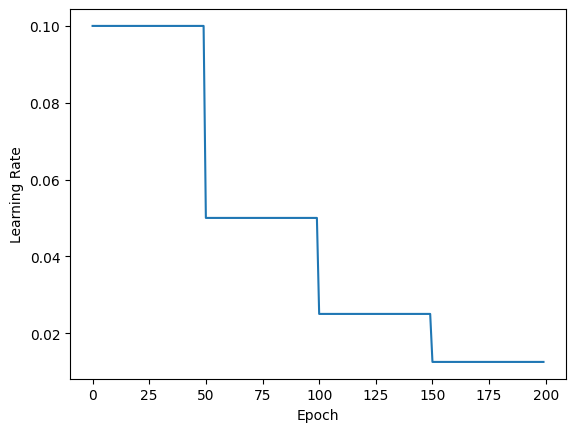

lr_list: [[0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.1], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.05], [0.025], [0.025], [0.025], [0.025], [0.0

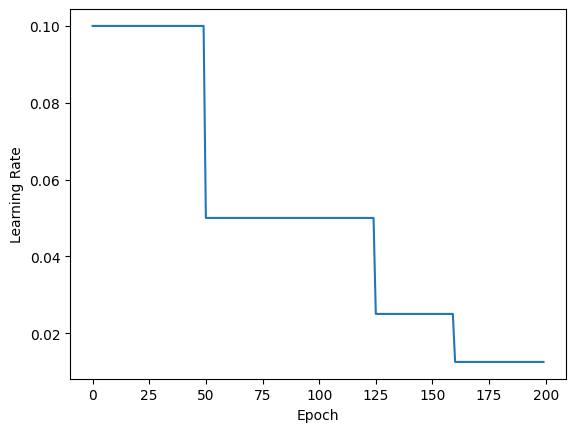

lr_list: [[0.1], [0.095], [0.09025], [0.0857375], [0.08145062499999998], [0.07737809374999999], [0.07350918906249998], [0.06983372960937498], [0.06634204312890622], [0.0630249409724609], [0.05987369392383786], [0.05688000922764597], [0.05403600876626367], [0.05133420832795048], [0.04876749791155295], [0.046329123015975304], [0.04401266686517654], [0.04181203352191771], [0.039721431845821824], [0.037735360253530734], [0.035848592240854196], [0.03405616262881148], [0.03235335449737091], [0.030735686772502362], [0.029198902433877242], [0.027738957312183378], [0.026352009446574207], [0.025034408974245494], [0.023782688525533217], [0.022593554099256556], [0.021463876394293726], [0.020390682574579037], [0.019371148445850084], [0.01840259102355758], [0.0174824614723797], [0.016608338398760712], [0.015777921478822676], [0.014989025404881541], [0.014239574134637464], [0.01352759542790559], [0.012851215656510309], [0.012208654873684792], [0.011598222130000552], [0.011018311023500524], [0.0104673

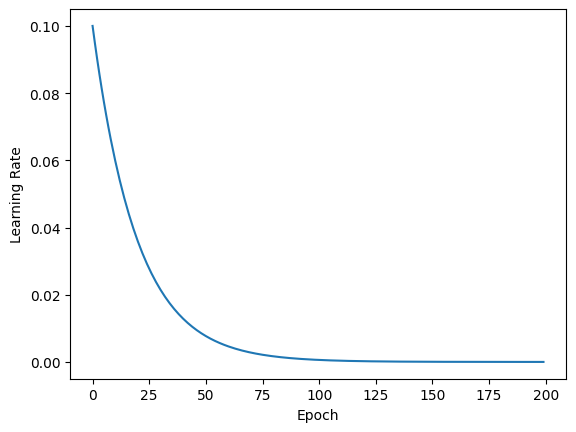

In [4]:
"""
案例:
    演示学习率衰减策略.

学习率衰减策略介绍:
    目的:
        较之于AdaGrad, RMSProp, Adam方式, 我们可以通过 等间隔, 指定间隔, 指数等方式, 来手动控制学习率的调整.

    分类:
        等间隔学习率衰减
        指定间隔学习率衰减
        指数学习率衰减

等间隔学习率衰减:
    step_size: 间隔的轮数, 即: 多少轮调整一次学习率.
    gamma:     学习率衰减系数, 即: lr新 = lr旧 * gamma

指定间隔学习率衰减:
    milestones = [50, 125, 160]     里边定义的是要调整学习率的 轮数.
    gamma:     学习率衰减系数, 即: lr新 = lr旧 * gamma

指数间隔学习率衰减:
    前期学习率衰减快, 中期慢, 后期更慢, 更符合梯度下降规律.
    公式:
        lr新 = lr旧 * gamma ** epoch

总结:
    等间隔学习率衰减:
        优点:
            直观, 易于调试, 适用于 大批量数据.
        缺点:
            学习率变化较大, 可能跳过最优解.
        应用场景:
            大型数据集, 较为简单的任务.

    指定间学习率衰减:
        优点:
            易于调试, 稳定训练过程.
        缺点:
            在某些情况下可能衰减过快, 导致优化提前停滞.
        应用场景:
            对训练平稳性要求较高的任务.
   指数学习率衰减:
        优点:
            平滑, 且考虑历史更新, 收敛稳定性较强.
        缺点:
            超参调节较为复杂, 可能需要更多的资源.
        应用场景:
            高精度训练, 避免过快收敛.

"""

# 导包
import torch
from torch import optim
import matplotlib.pyplot as plt


# 1. 定义函数, 演示: 等间隔学习率衰减
def dm01():
    # 1. 定义变量, 记录初始的 学习率, 训练的轮数, 每轮训练的批次数.
    lr, epochs, iteration = 0.1, 200, 10

    # 2. 创建数据集.  y_true, x, w
    # 真实值.
    y_true = torch.tensor([0])
    # 输入特征
    x = torch.tensor([1.0], dtype=torch.float32)
    # 权重参数w, 需要自动微分(求导)
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)

    # 3. 创建优化器对象, 动量法 -> 加速模型的收敛, 减少震荡.
    # 参1: 待优化的参数, 参2: 学习率, 参3: 动量系数
    optimizer = optim.SGD([w], lr=lr, momentum=0.9)

    # 4. 创建学习率衰减对象.
    # 思路1: 创建等间隔学习率衰减对象.
    # 参1: 优化器对象, 参2: 间隔的轮数(多少轮调整一次学习率), 参3: 学习率衰减系数.
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)   # [0.1, 0.1, 0.1... 0.05...]

    # 5. 创建两个列表, 分别表示: 训练轮数, 每轮训练用的学习率
    # epoch_list = [0, 1, 2, 3.... 50, 51, 52...100, 101, 101... 150, 151...199]
    # lr_list =    [0.1, 0.1, 0.1, 0.05........,0.025.........,  0.0125...]
    lr_list, epoch_list = [], []

    # 6. 循环遍历训练轮数, 进行具体的训练.
    for epoch in range(epochs):     # epoch: 0 ~ 199
        # 7. 获取当前轮数 和 学习率, 并保存到列表中.
        epoch_list.append(epoch)
        lr_list.append(scheduler.get_last_lr())     # 获取最后的lr(learning rate, 学习率)

        # 8. 循环遍历, 每轮每批次进行训练.
        for batch in range(iteration):
            # 9. 先计算预测值, 然后基于损失函数计算损失.
            y_pred = w * x
            # 10. 计算损失, 最小二乘法.
            loss = (y_pred - y_true) ** 2
            # 11. 梯度清零 + 反向传播 + 优化器更新参数.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # 12. 更新学习率.
        scheduler.step()
    # 13. 打印结果:
    print(f'lr_list: {lr_list}')        # [0.1, 0.1, 0.1..., 0.05........,0.025.........,  0.0125...]

    # 14. 可视化.
    # x轴: 训练的轮数, y轴: 每轮训练用的学习率
    plt.plot(epoch_list, lr_list)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.show()


# 2. 定义函数, 演示: 指定间隔学习率衰减
def dm02():
    # 1. 定义变量, 记录初始的 学习率, 训练的轮数, 每轮训练的批次数.
    lr, epochs, iteration = 0.1, 200, 10

    # 2. 创建数据集.  y_true, x, w
    # 真实值.
    y_true = torch.tensor([0])
    # 输入特征
    x = torch.tensor([1.0], dtype=torch.float32)
    # 权重参数w, 需要自动微分(求导)
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)

    # 3. 创建优化器对象, 动量法 -> 加速模型的收敛, 减少震荡.
    # 参1: 待优化的参数, 参2: 学习率, 参3: 动量系数
    optimizer = optim.SGD([w], lr=lr, momentum=0.9)

    # 4. 创建学习率衰减对象.
    # 思路1: 创建等间隔学习率衰减对象.
    # 参1: 优化器对象, 参2: 间隔的轮数(多少轮调整一次学习率), 参3: 学习率衰减系数.
    # scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)   # [0.1, 0.1, 0.1... 0.05...]

    # 思路2: 创建指定间隔学习率衰减对象.
    # 定义变量, 记录要修改学习率的轮数.
    milestones = [50, 125, 160]
    scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.5)

    # 5. 创建两个列表, 分别表示: 训练轮数, 每轮训练用的学习率
    # epoch_list = [0, 1, 2, 3.... 50, 51, 52...100, 101, 101... 150, 151...199]
    # lr_list =    [0.1, 0.1, 0.1, 0.05........,0.025.........,  0.0125...]
    lr_list, epoch_list = [], []

    # 6. 循环遍历训练轮数, 进行具体的训练.
    for epoch in range(epochs):     # epoch: 0 ~ 199
        # 7. 获取当前轮数 和 学习率, 并保存到列表中.
        epoch_list.append(epoch)
        lr_list.append(scheduler.get_last_lr())     # 获取最后的lr(learning rate, 学习率)

        # 8. 循环遍历, 每轮每批次进行训练.
        for batch in range(iteration):
            # 9. 先计算预测值, 然后基于损失函数计算损失.
            y_pred = w * x
            # 10. 计算损失, 最小二乘法.
            loss = (y_pred - y_true) ** 2
            # 11. 梯度清零 + 反向传播 + 优化器更新参数.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # 12. 更新学习率.
        scheduler.step()
    # 13. 打印结果:
    print(f'lr_list: {lr_list}')        # [0.1, 0.1, 0.1..., 0.05........,0.025.........,  0.0125...]

    # 14. 可视化.
    # x轴: 训练的轮数, y轴: 每轮训练用的学习率
    plt.plot(epoch_list, lr_list)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.show()


# 3. 定义函数, 演示: 指数学习率衰减
def dm03():
    # 1. 定义变量, 记录初始的 学习率, 训练的轮数, 每轮训练的批次数.
    lr, epochs, iteration = 0.1, 200, 10

    # 2. 创建数据集.  y_true, x, w
    # 真实值.
    y_true = torch.tensor([0])
    # 输入特征
    x = torch.tensor([1.0], dtype=torch.float32)
    # 权重参数w, 需要自动微分(求导)
    w = torch.tensor([1.0], requires_grad=True, dtype=torch.float32)

    # 3. 创建优化器对象, 动量法 -> 加速模型的收敛, 减少震荡.
    # 参1: 待优化的参数, 参2: 学习率, 参3: 动量系数
    optimizer = optim.SGD([w], lr=lr, momentum=0.9)

    # 4. 创建学习率衰减对象.
    # 思路1: 创建等间隔学习率衰减对象.
    # 参1: 优化器对象, 参2: 间隔的轮数(多少轮调整一次学习率), 参3: 学习率衰减系数.
    # scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.5)   # [0.1, 0.1, 0.1... 0.05...]

    # 思路2: 创建指定间隔学习率衰减对象.
    # 定义变量, 记录要修改学习率的轮数.
    # milestones = [50, 125, 160]
    # scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.5)

    # 思路3: 创建指数学习率衰减对象.
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)

    # 5. 创建两个列表, 分别表示: 训练轮数, 每轮训练用的学习率
    # epoch_list = [0, 1, 2, 3.... 50, 51, 52...100, 101, 101... 150, 151...199]
    # lr_list =    [0.1, 0.1, 0.1, 0.05........,0.025.........,  0.0125...]
    lr_list, epoch_list = [], []

    # 6. 循环遍历训练轮数, 进行具体的训练.
    for epoch in range(epochs):     # epoch: 0 ~ 199
        # 7. 获取当前轮数 和 学习率, 并保存到列表中.
        epoch_list.append(epoch)
        lr_list.append(scheduler.get_last_lr())     # 获取最后的lr(learning rate, 学习率)

        # 8. 循环遍历, 每轮每批次进行训练.
        for batch in range(iteration):
            # 9. 先计算预测值, 然后基于损失函数计算损失.
            y_pred = w * x
            # 10. 计算损失, 最小二乘法.
            loss = (y_pred - y_true) ** 2
            # 11. 梯度清零 + 反向传播 + 优化器更新参数.
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # 12. 更新学习率.
        scheduler.step()
    # 13. 打印结果:
    print(f'lr_list: {lr_list}')        # [0.1, 0.1, 0.1..., 0.05........,0.025.........,  0.0125...]

    # 14. 可视化.
    # x轴: 训练的轮数, y轴: 每轮训练用的学习率
    plt.plot(epoch_list, lr_list)
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.show()




# 4. 测试
if __name__ == '__main__':
    dm01()
    dm02()
    dm03()


In [ ]:
"""
案例:
    代码演示 随机失活.

正则化的作用:
    缓解模型的过拟合情况.

正则化的方式:
    L1正则化: 权重可以变为0, 相当于: 降维.
    L2正则化: 权重可以无限接近0
    DropOut: 随机失活, 每批次样本训练时, 随机让一部分神经元死亡, 防止一些特征对结果的影响较大(防止过拟合)
    BN(批量归一化): ...
"""

# 导包
import torch
import torch.nn as nn


# 1. 定义函数, 演示: 随机失活(DropOut)
def dm01():
    # 1. 创建隐藏层输出结果.
    t1 = torch.randint(0, 10, size=(1, 4)).float()
    print(f't1: {t1}')      # t1: tensor([[0., 5., 6., 3.]])

    # 2. 进行下一层 加权求和 和 激活函数计算.
    # 2.1 创建全连接层(充当线性层)
    # 参1: 输入特征维度, 参2: 输出特征维度.
    linear1 = nn.Linear(4, 5)

    # 2.2 加权求和.
    l1 = linear1(t1)
    print(f'l1: {l1}')

    # 2.3 激活函数.
    output = torch.relu(l1)
    print(f'output: {output}')

    # 3. 对激活值进行随机失活dropout处理 -> 只有训练阶段有, 测试阶段没有.
    dropout = nn.Dropout(p=0.5) # 每个神经元都有50%的概率被 kill.
    # 具体的 随机失活动作.
    d1 = dropout(output)
    print(f'd1(随机失活后的数据): {d1}')        # 未被失活的进行缩放, 缩放比例为: 1 / (1 - p) = 2


# 2. 测试
if __name__ == '__main__':
    dm01()

In [ ]:
"""
案例:
    代码演示批量归一化,  它(批量归一化)也属于正则化的一种, 也是用于 缓解模型的 过拟合情况的.

批量归一化:
    思路:
        先对数据做标准化(会丢失一些信息), 然后再对数据做 缩放(λ, 理解为: w权重) 和 平移(β, 理解为: b偏置), 再找补回一些信息.
    应用场景:
        批量归一化在计算机视觉领域使用较多.

        BatchNorm1d：主要应用于全连接层或处理一维数据的网络，例如文本处理。它接收形状为 (N, num_features) 的张量作为输入。
        BatchNorm2d：主要应用于卷积神经网络，处理二维图像数据或特征图。它接收形状为 (N, C, H, W) 的张量作为输入。
        BatchNorm3d：主要用于三维卷积神经网络 (3D CNN)，处理三维数据，例如视频或医学图像。它接收形状为 (N, C, D, H, W) 的张量作为输入。
"""

# 导包
import torch
import torch.nn as nn


# 1. 定义函数, 处理 二维数据.
def dm01():
    # 1. 创建图像样本数据.
    # 1张图片, 2个通道, 3行4列(像素点)
    input_2d = torch.randn(size=(1, 2, 3, 4))
    print(f'input_2d: {input_2d}')

    # 2. 创建批量归一化层(BN层)
    # 参1: 输入特征数 = 图片的通道数.
    # 参2: 噪声值(小常数), 默认为1e-5.
    # 参3: 动量值, 用于计算移动平局统计量的  动量值.
    # 参4: 表示使用可学习的变换参数(λ, β) 对归一化(标准化)后的数据进行 缩放和平移.
    bn2d = nn.BatchNorm2d(num_features=2, eps=1e-5, momentum=0.1, affine=True)

    # 3. 对数据进行 批量归一化处理.
    output_2d = bn2d(input_2d)
    print(f'output_2d: {output_2d}')


# 2. 定义函数, 处理: 一维数据.
def dm02():
    # 1. 创建样本数据.
    # 2行2列, 2条样本, 每个样本有2个特征
    input_1d = torch.randn(size=(2, 2))
    print(f'input_1d: {input_1d}')

    # 2. 创建线性层.
    linear1 = nn.Linear(2, 4)

    # 3. 对数据进行 线性变换.
    l1 = linear1(input_1d)
    print(f'l1: {l1}')

    # 4. 创建批量归一化层.
    bn1d = nn.BatchNorm1d(num_features=4)
    # 5. 对线性处理结果l1 进行 批量归一化处理.
    output_1d = bn1d(l1)
    print(f'output_1d: {output_1d}')



# 3. 测试
if __name__ == '__main__':
    dm01()
    dm02()